#Verify Environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

In [4]:
import seaborn as sns
sns.set()

In [5]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', 199) 

#Check Data

In [6]:
health_data = pd.read_csv("./fetal_health.csv")

In [7]:
health_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
#print list of columns
health_data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

On This Dataset Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

Normal
Suspect
Pathological


Target

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [9]:
health_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
health_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
health_data.shape

(2126, 22)

In [12]:
# Count the missing and null values for dataset fetal healt.
miss_values = health_data.columns[health_data.isnull().any()]
print(f"Missing values:\n{health_data[miss_values].isnull().sum()}")

null_values = health_data.columns[health_data.isna().any()]
print(f"Null values:\n{health_data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [13]:
#1 Normal
#2 Suspect
#3 Pathological
health_data["fetal_health"].value_counts()
# 1.0    1655
# 2.0     295
# 3.0     176

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [14]:
(health_data["fetal_health"].value_counts()/health_data["fetal_health"].shape)*100

1.0    77.845720
2.0    13.875823
3.0     8.278457
Name: fetal_health, dtype: float64

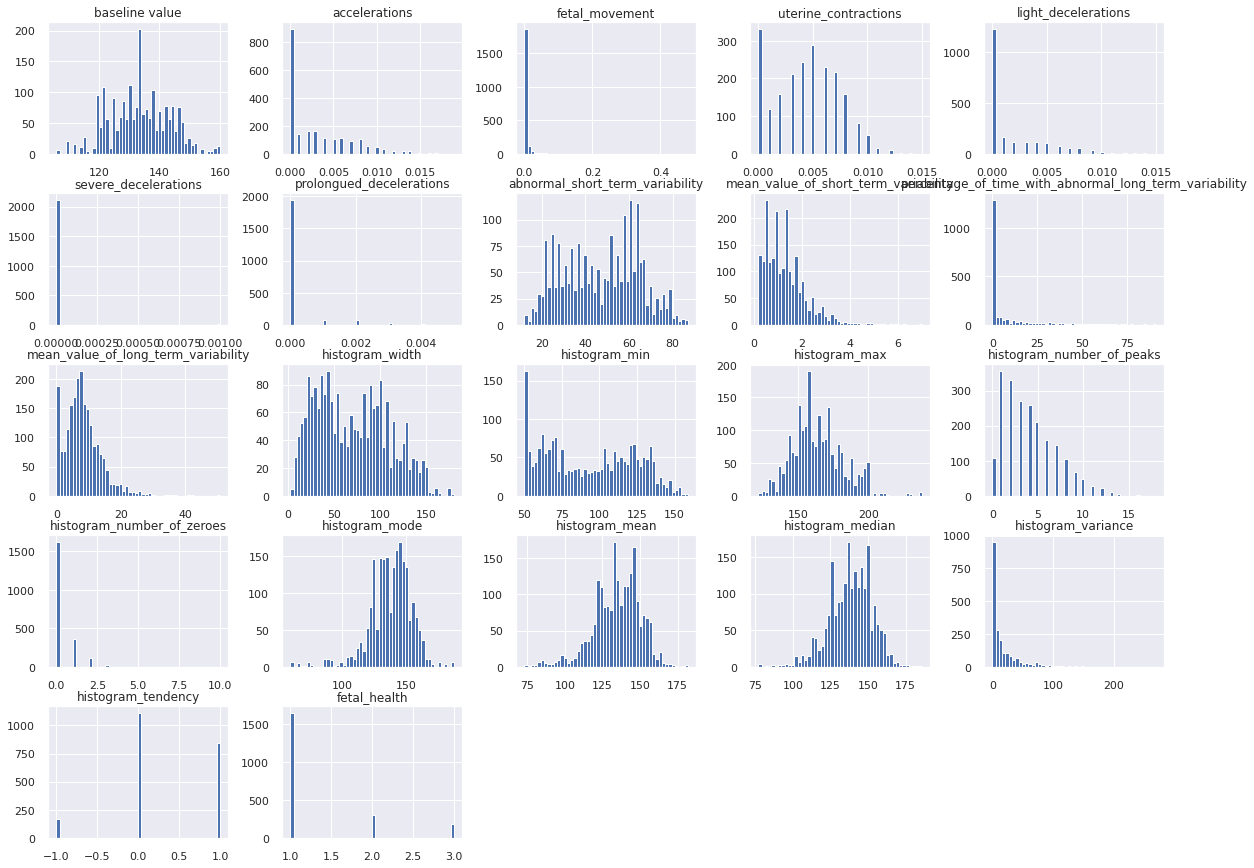

In [15]:
health_data.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
#Find total number of zeros
# Count number of zeros in all columns of Dataframe
for column_name in health_data.columns:
    column = health_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, ' is : ', count)

Count of zeros in column baseline value  is :  0
Count of zeros in column accelerations  is :  894
Count of zeros in column fetal_movement  is :  1311
Count of zeros in column uterine_contractions  is :  332
Count of zeros in column light_decelerations  is :  1231
Count of zeros in column severe_decelerations  is :  2119
Count of zeros in column prolongued_decelerations  is :  1948
Count of zeros in column abnormal_short_term_variability  is :  0
Count of zeros in column mean_value_of_short_term_variability  is :  0
Count of zeros in column percentage_of_time_with_abnormal_long_term_variability  is :  1240
Count of zeros in column mean_value_of_long_term_variability  is :  137
Count of zeros in column histogram_width  is :  0
Count of zeros in column histogram_min  is :  0
Count of zeros in column histogram_max  is :  0
Count of zeros in column histogram_number_of_peaks  is :  107
Count of zeros in column histogram_number_of_zeroes  is :  1624
Count of zeros in column histogram_mode  i

In [17]:
corr_matrix = health_data.corr()
corr_matrix["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

#Stratified data split

In [18]:
#TEMPLATE - prepare X & y
X = health_data.drop("fetal_health",axis = 1)
y = health_data.fetal_health

In [19]:
#TEMPLATE - create a stratified split
from sklearn.model_selection import train_test_split
X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
#total rows: 2126
#train set: 1488
  #train set: 
  #validation set: 
#test set: 638

In [20]:
X.shape

(2126, 21)

In [21]:
feature_names = list(health_data.columns[:-1])
feature_target = list(health_data.columns[-1:])
print('feature_names:',feature_names)
print('feature_target:',feature_target)

feature_names: ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
feature_target: ['fetal_health']


In [22]:
#TEMPLATE - verifying its a stratified split
def outcome_cat_proportions(data):
  return data.value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": outcome_cat_proportions(health_data["fetal_health"]),
    "Train data": outcome_cat_proportions(y_train),
    "Test data": outcome_cat_proportions(y_test)
})
compare_props

,Overall,Train data,Test data
1.0,0.778457,0.778226,0.778997
2.0,0.138758,0.139113,0.137931
3.0,0.082785,0.082661,0.083072


# Train Data cleaning

In [23]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =  pd.DataFrame(sc_X.fit_transform(X_train_raw),columns=feature_names)

In [24]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,1488.0,-1.293470e-15,1.000336,-2.772164,-0.722484,-0.005097,0.712291,2.761970
accelerations,1488.0,-8.761753e-17,1.000336,-0.828588,-0.828588,-0.313468,0.716771,3.807490
fetal_movement,1488.0,-8.994448e-17,1.000336,-0.208281,-0.208281,-0.208281,-0.147615,9.437601
uterine_contractions,1488.0,-1.211695e-16,1.000336,-1.491886,-0.806194,-0.120503,0.565189,3.307954
light_decelerations,1488.0,2.644241e-16,1.000336,-0.628120,-0.628120,-0.628120,0.400844,4.516703
severe_decelerations,1488.0,-1.302908e-17,1.000336,-0.051917,-0.051917,-0.051917,-0.051917,19.261360
prolongued_decelerations,1488.0,-6.935163e-16,1.000336,-0.272159,-0.272159,-0.272159,-0.272159,8.235661
abnormal_short_term_variability,1488.0,-1.509023e-16,1.000336,-2.021587,-0.861919,0.065816,0.819600,2.269185
mean_value_of_short_term_variability,1488.0,-2.013025e-16,1.000336,-1.279636,-0.717856,-0.156075,0.405705,6.360579
percentage_of_time_with_abnormal_long_term_variability,1488.0,7.173921e-17,1.000336,-0.532022,-0.532022,-0.532022,0.063121,4.391439


#Test Data Cleaning

In [25]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test =  pd.DataFrame(sc_X.fit_transform(X_test_raw),columns=feature_names)

In [26]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,638.0,-4.966421e-16,1.000785,-2.789761,-0.689681,-0.089659,0.685371,2.510440
accelerations,638.0,-1.301641e-16,1.000785,-0.808095,-0.808095,-0.546387,0.500445,4.164356
fetal_movement,638.0,-1.696657e-18,1.000785,-0.192622,-0.192622,-0.192622,-0.141735,12.045795
uterine_contractions,638.0,2.683329e-16,1.000785,-1.461839,-0.797556,-0.133273,0.863152,3.520284
light_decelerations,638.0,-1.023215e-16,1.000785,-0.662811,-0.662811,-0.662811,0.646394,3.919406
severe_decelerations,638.0,-9.453427e-17,1.000785,-0.068734,-0.068734,-0.068734,-0.068734,14.548769
prolongued_decelerations,638.0,-8.944430e-17,1.000785,-0.260927,-0.260927,-0.260927,-0.260927,6.465188
abnormal_short_term_variability,638.0,-1.364287e-16,1.000785,-2.010655,-0.896301,0.159404,0.804556,2.329462
mean_value_of_short_term_variability,638.0,-1.632271e-16,1.000785,-1.291066,-0.713922,-0.194492,0.440366,6.442666
percentage_of_time_with_abnormal_long_term_variability,638.0,1.134585e-16,1.000785,-0.543331,-0.543331,-0.543331,0.102985,4.187147


# Grid search
Grid search to find best parameters


In [ ]:
np.arange(0.06, 0.07, 0.001)

array([0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068,
       0.069, 0.07 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = [
    # try combinations of depth starting at 2
    # {'C': [np.arange(0.60, .80, 0.02)], 'n_estimators': list(range(5,60))}
    { 'n_neighbors' : np.arange(1,100,1),
      # 'weights' : ['uniform','distance'],
     'weights' : ['distance'],
      # 'metric' : ['minkowski','euclidean','manhattan'],
     'metric' : ['manhattan'],
     }
  ]

knn_clf = KNeighborsClassifier()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['manhattan'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                          'weights': ['distance']}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_search_df = pd.DataFrame({'param': grid_search.cv_results_["params"], 'f1_weighted': grid_search.cv_results_["mean_test_score"]})
grid_search_df.sort_values(by=['f1_weighted'], ascending=False)

,param,f1_weighted
3,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}",0.915276
2,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}",0.914781
5,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",0.909001
7,"{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}",0.908850
4,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}",0.908174
9,"{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}",0.907542
6,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}",0.907301
0,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}",0.906205
1,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}",0.906205
10,"{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}",0.901904


#Run Best Estimator

In [36]:
from sklearn.neighbors import KNeighborsClassifier
#Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()

# best_estimator = KNeighborsClassifier(metric='euclidean',n_neighbors=20, weights='distance')
best_estimator = KNeighborsClassifier(metric='manhattan',n_neighbors=10,weights='distance')
best_est_title = 'manhattan|k:10|distance'

# Learning Curve
Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()

In [37]:
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, y, cv,title):
   tot_col = 2
  #call learning curve function
   train_sizes, train_scores, validation_scores,fit_times, _ = learning_curve(estimator, data[features], y, cv = cv, scoring = 'f1_weighted', shuffle=True,return_times=True)
   #find the mean values
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   fit_times_mean = fit_times.mean(axis = 1)
   #Plot-1 - Learning Curve: training error and validation error   
   plt.subplot(1,tot_col,(1))
   plt.plot(train_sizes, train_scores_mean, "o-", label = 'Training score')
   plt.plot(train_sizes, validation_scores_mean, "o-", label = 'Validation score')
   plt.ylabel('f1 weighted', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
  #  title = 'Learning curves for ' +  title
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)

   #Plot-2 - Scalability of the model - Plot n_samples vs fit_times
   plt.subplot(1,tot_col,(2))
   plt.plot(train_sizes, fit_times_mean, "o-", label = 'Training fit-times')
   plt.ylabel('fit_times', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
   plt.title("Scalability of the model", fontsize = 18, y = 1.03)
   plt.legend()
  #  plt.ylim(*ylim)

  #  #Plot-3 - Performance of the model - Plot fit_time vs score
  #  fit_time_argsort = fit_times_mean.argsort()
  #  fit_time_sorted = fit_times_mean[fit_time_argsort]
  #  validation_scores_mean_sorted = validation_scores_mean[fit_time_argsort]
  # #  test_scores_std_sorted = test_scores_std[fit_time_argsort]
  #  plt.subplot(1,tot_col,(3))
  #  plt.plot(fit_time_sorted, validation_scores_mean_sorted)
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Score', fontsize = 14)
  #  plt.title("Performance of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  #  plt.ylim(*ylim)

In [38]:
from sklearn.model_selection import learning_curve

def learning_curves_single(estimator, data, features, y, cv,title):
   tot_col = 3
  #call learning curve function
   train_sizes, train_scores, validation_scores,fit_times, _ = learning_curve(estimator, data[features], y, cv = cv, scoring = 'f1_weighted', shuffle=True,return_times=True)
   #find the mean values
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   fit_times_mean = fit_times.mean(axis = 1)
   #Plot-1 - Learning Curve: training error and validation error   
   plt.subplot(1,tot_col,(1))
   plt.plot(train_sizes, train_scores_mean, "o-", label = 'Training score')
   plt.plot(train_sizes, validation_scores_mean, "o-", label = 'Validation score')
   plt.ylabel('f1 weighted', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
  #  title = 'Learning curves for ' +  title
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)

  #  #Plot-2 - Scalability of the model - Plot n_samples vs fit_times
  #  plt.subplot(1,tot_col,(2))
  #  plt.plot(train_sizes, fit_times_mean, "o-", label = 'Training fit-times')
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Training set size', fontsize = 14)
  #  plt.title("Scalability of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  # #  plt.ylim(*ylim)

  #  #Plot-3 - Performance of the model - Plot fit_time vs score
  #  fit_time_argsort = fit_times_mean.argsort()
  #  fit_time_sorted = fit_times_mean[fit_time_argsort]
  #  validation_scores_mean_sorted = validation_scores_mean[fit_time_argsort]
  # #  test_scores_std_sorted = test_scores_std[fit_time_argsort]
  #  plt.subplot(1,tot_col,(3))
  #  plt.plot(fit_time_sorted, validation_scores_mean_sorted)
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Score', fontsize = 14)
  #  plt.title("Performance of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  #  plt.ylim(*ylim)

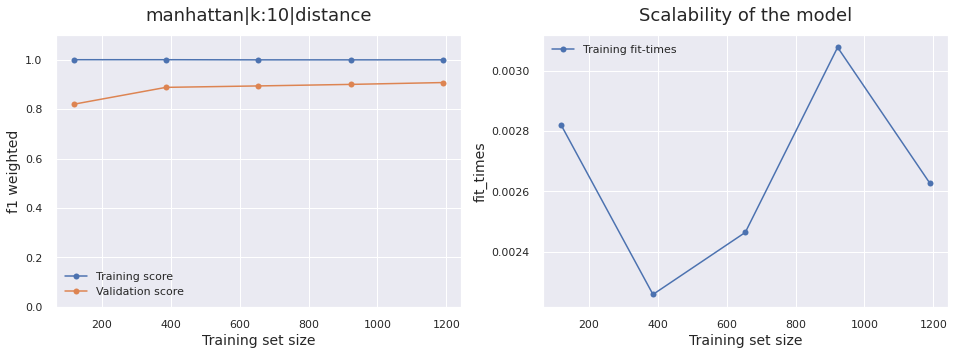

In [39]:
#run learning_curves
plt.figure(figsize = (16,5))
# dist_estimator = KNeighborsClassifier(metric='manhattan',n_neighbors=10,weights='uniform')
# dist_est_title = 'manhattan|k:10|uniform'
# learning_curves_single(dist_estimator, X_train, feature_names, y_train, 5,dist_est_title)
learning_curves(best_estimator, X_train, feature_names, y_train, 5,best_est_title)
plt.savefig('learning_curves.pdf')  

# Confusion Matrix, Precisioin & Recall

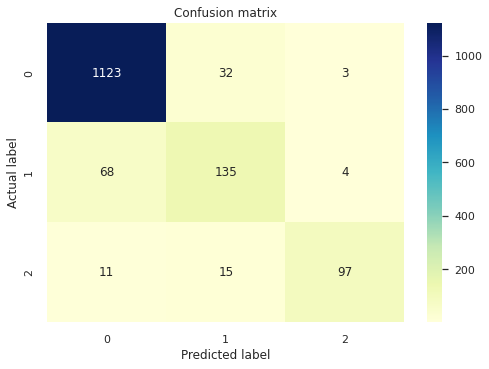

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

y_train_pred = cross_val_predict(best_estimator,X_train,y_train, cv=5)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.pdf')  

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred,average='weighted')

0.9078345074870103

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,y_train_pred,average='weighted')

0.9073635462445611

In [ ]:
recall_score(y_train,y_train_pred,average='weighted')

0.9106182795698925

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      1158
         2.0       0.74      0.65      0.69       207
         3.0       0.93      0.79      0.85       123

    accuracy                           0.91      1488
   macro avg       0.87      0.80      0.83      1488
weighted avg       0.91      0.91      0.91      1488



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# lin_svc = LinearSVC(random_state=42,loss='hinge')
lin_svc = SVC(kernel="linear",random_state=42)
poly_svc = SVC(kernel="poly",random_state=42, degree=3)
sigmoid_svc = SVC(kernel="sigmoid",random_state=42)
rbf_svc = SVC(kernel="rbf",random_state=42)
class_objects = [sigmoid_svc,poly_svc,lin_svc,rbf_svc] # make sure both arrays class_objects and class_names match
class_names = ['sigmoid','poly','linear','RBF'] # make sure both arrays class_objects and class_names match
class_scores = []


for classifier, name in zip(class_objects,class_names):
  scores = cross_val_score(classifier, X_train, y_train, scoring='f1_weighted',cv=5)
  class_scores.append(scores.mean())

class_scores

[0.7882749154257029,
 0.8868544478628542,
 0.8999672870677238,
 0.9096037888257689]

(0.7, 1.0)

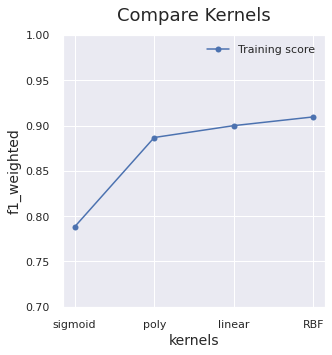

In [ ]:
#View kernel scores
plt.figure(figsize = (16,5))
plt.subplot(1,3,1)

plt.plot(class_names, class_scores,"o-", label = 'Training score')
   # provide x & y labels
plt.ylabel('f1_weighted', fontsize = 14)
plt.xlabel('kernels', fontsize = 14)
title =  "Compare Kernels"
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.7,1.0)

# Validation Curve
generate validation curve to develop intuition for analysis

In [ ]:
from sklearn.model_selection import validation_curve

def validation_curves(estimator, title, data, features, y,param_name, xax_param_name, param_range,invert_axis,xscale,ylimt):
   #call valiidation curve function
   train_scores, validation_scores = validation_curve(estimator, data[features], y, param_name=param_name, param_range=param_range, cv = 5, scoring = 'f1_weighted')
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   #Plot training error and validation error   
   plt.plot(param_range, train_scores_mean,label = 'Training score')
   plt.plot(param_range, validation_scores_mean, label = 'Validation score')
   # provide x & y labels
   plt.ylabel('f1_weighted', fontsize = 14)
   plt.xlabel(xax_param_name, fontsize = 14)
   ax = plt.gca()
   if xscale == 'log':
     ax.set_xscale('log')
   if invert_axis:
     ax.invert_xaxis()
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(ylimt[0],ylimt[1])



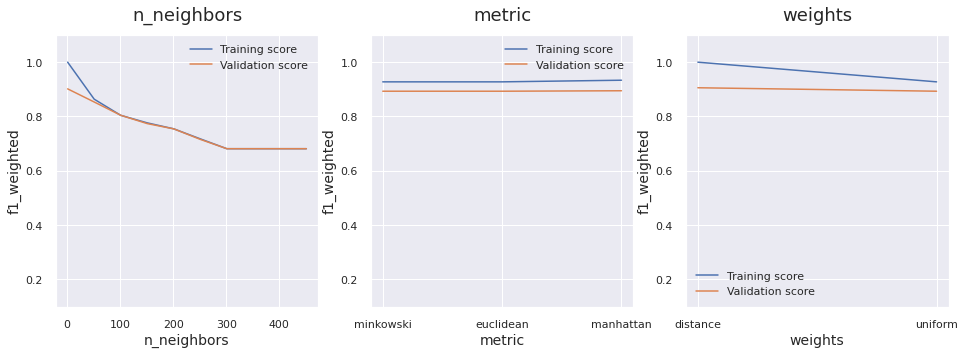

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#execute validation curves
plt.figure(figsize = (16,5))


#Generate validation curves

vld_clf = KNeighborsClassifier()
# 'weights' : ['uniform','distance'],
#       'metric' : ['minkowski','euclidean','manhattan']

# (vld_clf,"weights", "weights", "weights", ['uniform','distance'], 0,False,None,(0.1,1.10))

for model, title, param_name, xax_param_name, param_range,i,invert_axis,xscale,ylimt in [(vld_clf,"n_neighbors", "n_neighbors", "n_neighbors", np.arange(1, 500, 50), 0,False,None,(0.1,1.10)),(vld_clf,"metric", "metric", "metric", ['minkowski','euclidean','manhattan'], 1,False,None,(0.1,1.10)),(vld_clf,"weights", "weights", "weights", ['uniform','distance'], 2,True,None,(0.1,1.10))]:
    plt.subplot(1,3,(i+1))
    validation_curves(model, title, X_train, feature_names, y_train, param_name, xax_param_name, param_range,invert_axis,xscale,ylimt)
plt.savefig('validation_curves.pdf')

#Test set prediction

In [ ]:
#fit the best model
best_estimator.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
#use the model to predict
y_test_pred = best_estimator.predict(X_test)

In [ ]:
#calculate weighted f1 score weighted
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred,average='weighted')

0.9008930903866248

In [ ]:
precision_score(y_test,y_test_pred,average='weighted')

0.9028274257614048

In [ ]:
recall_score(y_test,y_test_pred,average='weighted')

0.9059561128526645

#References


*   Learning curves for ML: https://www.dataquest.io/blog/learning-curves-machine-learning/
*   Scoring values for learning_curve: https://stackoverflow.com/questions/46863421/what-is-the-score-in-plot-learning-curve-of-scikit-learn
* Measures of central tendancy: Mean, Median & Mode : https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/
* validation curves: https://www.geeksforgeeks.org/validation-curve/
* Applied machine learning: https://amueller.github.io/aml/00-introduction/00-introduction.html
